# Samenvatting

## Inleiding
In dit deel wordt er besproken hoe je kan nagaan of je een bewering kan bevestigen of ontkrachten door middel van een steekproef. In een onderzoek wordt er meestal vertrokken van een **hypothese**. In het onderzoek worden er steekproefen gedan die worden vergeleken met wat men verwacht.

## Voorbeeld
We willen in een bedrijf de elektriciteit aanpassen zodat alle werknemers met een laptop kunnen werken. Aan de hand van een **steekproef** meten we het verbruik van 30 laptops.

In [1]:
import pandas as pd

laptops = pd.Series([41.7, 10.0, 32.4, 52.1, 23.8, 36.7, 50.4, 41.2,
                     28.3, 3.1, 79.7, 22.5, 35.2, 65.3, 54.1, 85.0,
                     72.8, 8.4, 46.6, 27.6, 39.2, 57.6, 35.0, 42.3,
                     54.5, 36.4, 13.7, 40.7, 28.3, 26.4], name='verbruik')

laptops

0     41.7
1     10.0
2     32.4
3     52.1
4     23.8
5     36.7
6     50.4
7     41.2
8     28.3
9      3.1
10    79.7
11    22.5
12    35.2
13    65.3
14    54.1
15    85.0
16    72.8
17     8.4
18    46.6
19    27.6
20    39.2
21    57.6
22    35.0
23    42.3
24    54.5
25    36.4
26    13.7
27    40.7
28    28.3
29    26.4
Name: verbruik, dtype: float64

### Het gemiddelde verbruik:

In [2]:
laptops.mean().round(1)

39.7

### Standaardafwijking:

In [3]:
round(laptops.std(), 3)

20.004

Wat zegt dit over de totale **populatie** van laptops?
- Hoe meer laptops we testen, hoe zekerder we kunnen zijn over de resultaten.
- Hoe groter de standaardafwijking in onze steekproef, hoe onzekerder we worden.
- We weten 100% zeker dat het gemiddelde verbruik van alle laptops tussen -∞ en +∞ ligt.
- We weten minder zeker dat het gemiddelde verbruik van de laptops tussen 30 en 50 Watt ligt.
- we zijn redelijk zeker dat het verbruik van alle laptops niet groter is dan 1000 Watt.
- We zijn 100% zeker dat het gemiddelde verbruik van alle laptops niet *exact* 39.7 Watt is.

## Betrouwbaarheidsintervallen

### normaalverdeling
In eerste instantie gaan we kijken naar een theoretisch model. We gaan ervan uit dat het verbruik van laptops normaal verdeeld is.
Het verwachte gemiddelde is da gelijk aan μ
en de standaardafwijking is gelijk aan σ

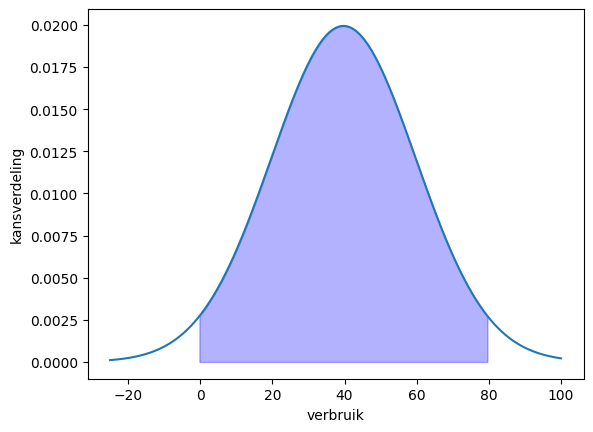

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, ax = plt.subplots()
x = np.linspace(-25, 100, 1000)
y = stats.norm.pdf(x, loc=laptops.mean(), scale=laptops.std())
plt.xlabel('verbruik')
plt.ylabel('kansverdeling')
plt.fill_between(x, y, where=(x > laptops.mean() - 2 * laptops.std()) & (x < laptops.mean() + 2 * laptops.std()),
                 color='b', alpha=0.3)
ax.plot(x, y)
plt.show()

Zoals boven te zien is het interval zeer breed. Als μ 39.7 is en σ 20, dan heeft een willekeurige laptop 95.5% zekerheid dat het verbruik tussen 0 en 80 Watt is.
Als we de steekproef vergoten dan zal het interval smaller worden. Hoe groter de steekproef dus, hoe meer kans je maakt om een **steekproefgemiddelde (x̂)** te vinden dat dicht bij het **populatiegemiddelde** ligt.

- De breedte van het interval mag gedeeld worden door $\sqrt{n}$ waarbij $n$ de grootte van de steekproef is.

### Betrouwbaarheidsinterval
Het betrouwbaarheidsinterval is een interval waarin we met een bepaalde zekerheid het populatiegemiddelde kunnen vinden.
Het betrouwbaarheidsinterval wordt berekend als volgt:
$$μ - \frac{2σ}{\sqrt{n}} < \bar{x} < μ + \frac{2σ}{\sqrt{n}}$$
- μ = gemiddelde
- σ = standaardafwijking
- n = aantal waarnemingen
- $\bar{x}$ = steekproefgemiddelde

Met deze formule kan ook μ worden berekend.
$$ \bar{x} - \frac{2σ}{\sqrt{n}} < μ < \bar{x} + \frac{2σ}{\sqrt{n}}$$

In Python kan dit berekend worden met volgende functie:

In [5]:
from functions.functions_Y2.Testing import *

#het eerste argument is de dataset waarop we het betrouwbaarheidsinterval willen berekenen
#het tweede argument is de betrouwbaarheid waarmee we het interval willen berekenen
left, right = betrouwbaarheids_interval(laptops, 0.90, t=False)

print(f"Left: {round(left, 1)}")
print(f"Right: {round(right, 1)}")

Left: 33.7
Right: 45.7


### De studentverdeling
Er is een probleem met de vorige formules. We gaan ervan uit dat we de normaalverdeling mogen gebruiken omdat de centrale limietstelling zegt dat dat mag wanneer de waarde σ kennen. We benaderen deze door $s$ omdat we ervan uitgaan dat de steekproef groot genoeg is. Dat laatste kan een probleem zijn. Steekproeven zijn niet altijd zo groot en daardoor zijn we te optimistisch met het inschatten van de standaardafwijking.
Daarom hebben we een andere verdeling nodig: de **studentverdeling** of de **t-verdeling**.

De studentverdeling heeft als gemiddelde 0 en de spreiding wordt bepaald door een parameter "t". De waarde van $t$ is gelijk aan $n-1$. Men noemt $t$ ook wel het aantal vrijheidsgraden.
Als $t$ heel groot wordt is er bijna geen verschil meer met de **standaardnormale verdeling**.

Als de steekproef klein is (n ≤ 30) dan gebruiken we beter de t-verdeling voor het betrouwbaarheidsinterval.

In Python kan dit berekend worden met volgende functie:

In [6]:
left, right = betrouwbaarheids_interval(laptops, 0.90)

print(f"Left: {round(left, 1)}")
print(f"Right: {round(right, 1)}")

Left: 33.5
Right: 45.9


### Toetsen
Betrouwbaarheidsintervallen zijn heel interessant omdat je vanuit een steekproef informatie kan halen over de populatie. Soms gebeurt de redenering eerder omgekeerd: iemand doet een bewering over de populatie waarna er een steekproef wordt genomen om die bewering te bevestigen of te ontkrachten. 

#### Hypothese
Als iemand een veronderstelling maakt over de **populatie**, noemt men dit een **hypothese**. Met een steekproef kunnen we nagaan of deze hypothese klopt of niet.
Het is makkelijker om een hypothese te ontkrachten dan te bevestigen. Om een hypothese te **verwerpen** zou een **oneindige steekproef** nodig zijn.

In de statistiek spreekt men van de **nulhypothese** $H_0$. Dit is de veronderstelling waar je een stuk vanuit gaat, maar je wenst tegen te spreken.
Het omgekeerde van de nulhypothese is de **alternatieve hypothese** $H_1$. 

Als een onderzoek wordt gedaan wordt er een besluit gevormd. Dit besluit is nooit 100% zeker. Het is altijd mogelijk dat er een fout is gemaakt. De kans dat er een fout is gemaakt noemen we het **significantieniveau**. Dit wordt voorgesteld door $\alpha$. De waarde van $\alpha$ is meestal 0.05. Dit betekent dat er 5% kans is dat er een fout is gemaakt als we $H_0$ verwerpen. We zijn 95% van ons besluit.

##### Type-I
Een type-I fout is waarbij we een steekproef nemen en de nulhypothese verwerpen terwijl deze eigenlijk waar is. Er is een kans $\alpha$ dat dit gebeurt.

##### Type-II
Een type-II fout is waarbij we een steekproef nemen en de nulhypothese niet verwerpen terwijl deze eigenlijk niet waar is.
Dit is in principe een zeer zware fout, maar deze komt wel vaak voor.

#### De t-toets
Er zijn 3 manieren om een hypothese te testen:
- **Betrouwbaarheidsinterval**
- **Aanvaardingsinterval**
- **p-waarde**

##### Betrouwbaarheidsinterval
$H_0$: μ = 50
$H_1$: μ ≠ 50
$\alpha$ = 0.05 → 95% betrouwbaarheid

In [7]:
left, right = betrouwbaarheids_interval(laptops, 0.95)

print(f"Left: {round(left, 2)}")
print(f"Right: {round(right, 2)}")

Left: 32.23
Right: 47.17


We zijn 95% zeker dat het echte populatiegemiddelde tussen 32.23 en 47.17 ligt. Er is maar 5% kans dat het populatiegemiddelde hier buiten ligt.

##### Aanvaardingsinterval
De redenering kan ook vanuit gedaan worden vanuit de hypothese. Stel dat de hypothese waar, dan weten we 95% zeker dat:
$$ μ - 2,045 * \frac{s}{\sqrt{n}} < \bar{x} < μ + 2,045 * \frac{s}{\sqrt{n}}$$
We verwachten dus da het gemiddelde van een steekproef tussen deze waarden ligt. Als het gemiddelde erbuiten ligt, verwerpen we de hypothese.

In [8]:
aanvaardings_interval(laptops, 50, 0.95, do_print=True)

42.5304 < x̄ < 57.4696
μ = 39.7
σ = 20.0041


(42.530358042669455, 57.469641957330545)

De gemiddelde waarde van 39.7 Watt ligt niet binnen het aanvaardingsinterval. We kunnen de $H_0$ hypothese verwerpen.
Er is wel 5% kans dat we een type-I fout maken.

##### p-waarde
De p-waarde begint vanaf de veronderstelling dat $H_0$ waar is. In de steekproef hebben we een gemiddelde van 39.7 Watt gevonden tegenover een verwacht gemiddelde van 50 Watt.
We vragen ons af wat de kans is dat we een gemiddelde van 39.7 Watt vinden als $H_0$ waar is. Als deze kans heel klein is, dan kunnen we $H_0$ verwerpen.
$H_0$ wordt verworpen als $p < \alpha$.

In [9]:
p_value_test(laptops, 50, do_print=True)

p = 0.0086
σ = 20.0041
t = -2.8202
α = 0.05
H0 is rejected


(0.008567157257391551, -2.8201974651935275)

#### De Z-toets
Als de steekproef groot genoeg is kan je gebruik maken van de Z-toets. De Z-toets maakt gebruik van de normaalverdeling in plaats van de studentverdeling. Als je de σ van de kleine steekproef kent, kan je de Z-toets ook gebruiken.

In [10]:
p, z = z_test(laptops, 50, 15)

print(f"p-waarde: {p}")

p-waarde: 0.00016921633029954434


#### Eenzijdige toetsen
Vorige technieken zeggen dat μ ≠ $H_0$. μ kan hier groter of kleiner zijn dan $H_0$, dit zijn **tweezijdige toetsen**
Soms kan het zijn dat je wilt bewijzen dat μ enkel groter of kleiner kan zijn. Dit is een **eenzijdige toets**
Stel dat $H_0$: μ < 32

In [11]:
betrouwbaarheids_interval(laptops, 0.90)

(33.494403197191005, 45.905596802809015)

$H_0$ ligt onder de ondergrens. We kunnen $H_0$ dus verwerpen.
Omdat we een eenzijdige toets doen, kunnen we de a-waarde halveren.

In [12]:
one_sided_a(laptops, 32, -1)

0.021881195018435013

#### De Chi-kwadraat toets
In de t-toets wordt de t-verdeling gebruikt als kansverdeling. Maar er zijn gevallen waar het beter is om een andere verdeling te gebruiken.

Stel dat we willen weten welke producten er goed verkopen in een winkel.
De eigenaar van de winkel heeft een hypothese:
- 30% van de verkopen zijn computers
- 10% naar films
- 30% naar spelletjes
- 30% naar televisies

Om dit na te gaan doen we een steekproef. Bij de eerstvolgende 30 klanten kijken we wat ze kopen. We vinden:

In [13]:
verkopen = pd.Series([15, 3, 7, 5], index=["computers", "films", "spelletjes", "televisies"], name='verkopen')

verkopen

computers     15
films          3
spelletjes     7
televisies     5
Name: verkopen, dtype: int64

Nu vragen we ons af of $H_0$ waar is.
Om hierop te antwoorden gaan we de afstand berekenen van de gemeten waarden tegenover de verwachte waarden.

Als de hypothese waar is, dan zouden we 9, 3, 9 en 9 verkopen verwachten. We kunnen de afstand berekenen met de volgende formule:
$$ \chi^2 = \sum \frac{(f_o - f_e)^2}{f_e}$$
waarbij:
- $f_o$ = de geobserveerde absolute frequenties
- $f_e$ = de verwachte absolute frequenties

In [14]:
fe = np.array([9, 3, 9, 9])

χ = chi_squared_test(verkopen, fe)

#OF

χ = stats.chisquare(f_obs=verkopen, f_exp=fe)

χ

Power_divergenceResult(statistic=6.222222222222222, pvalue=0.10128520246221875)

De chi-waarde is een soort afstand. Als de verwachte waarde overeenkomt met de werkelijke waarde dan zou de χ² 0 zijn. Hoe groter de waarde, hoe groter de afstand.

Wat is een grote afstand?
Met volgende code kunnen we de grenswaarde bepalen:

In [15]:
stats.chi2.ppf(0.95, len(verkopen) - 1)

7.814727903251179

De grenswaarde is hier ~7.8 de chi-waarde is 6.2. We hebben niet genoeg bewijs om te zeggen dat de eigenaar fout was maar ook niet dat hij gelijk had.